
ЛАБОРАТОРНАЯ РАБОТА 7. РАЗРАБОТКА ЕДИНОГО ШАБЛОНА ПРЕДВАРИТЕЛЬНОЙ ОБРАБОТКИ ДАННЫХ
Цели и задачи
Цель лабораторной работы: изучение теоретических принципов и инструментальных редств для построения пайплайна для предварительной обработки данных.
Основные задачи:
- предварительная обработка данных;
- изучение библиотек для предварительной обработки данных;
- масштабирование признаков;
- представление категориальных данных;
- построение пайплайна для предварительной обработки данных.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving bodyfat.csv to bodyfat.csv


In [ ]:
# Загрузка данных из файла
data = pd.read_csv('bodyfat.csv')

# Просмотр первых строк
print(data.head())

# Проверка на наличие пропущенных значений
print("\nКоличество пропущенных значений:\n", data.isnull().sum())


   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  

Количество пропущенных значений:
 Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [ ]:
# 3. Обработка пропущенных значений
# Если пропущенные значения существуют, заполняем их средним значением для числовых данных
data.fillna(data.mean(), inplace=True)

# После обработки пропущенных значений
print("\nПосле обработки пропущенных значений:")
print(data.isnull().sum())


После обработки пропущенных значений:
Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [ ]:
# 4. Обработка категориальных данных
# В данном наборе данных нет  категориальных признаков, но можно добавить диапазоны для возраста:
# Добавим категорию для возраста (молодой, средний, пожилой)
bins = [0, 30, 50, 100]
labels = ['Молодой', 'Средний', 'Пожилой']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Преобразуем категориальные данные в числовые (если бы они были)
data = pd.get_dummies(data, columns=['Age Group'], drop_first=True)

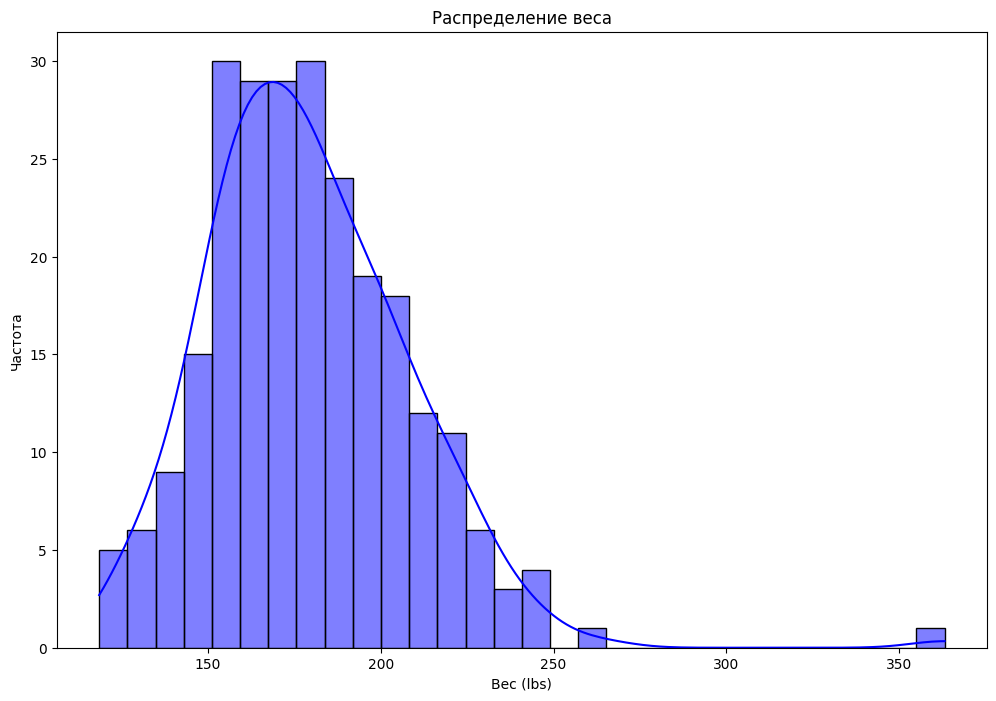

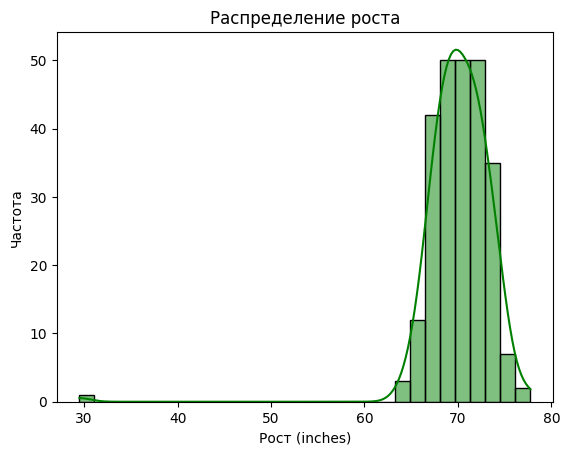

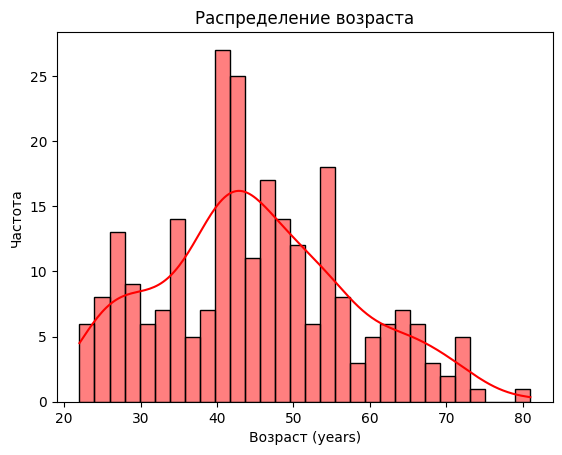

In [ ]:
 #Гистограмма для веса, роста и возраста
plt.figure(figsize=(12, 8))

# Гистограмма для веса (lbs)
sns.histplot(data['Weight'], kde=True, color='blue', bins=30)
plt.title('Распределение веса')
plt.xlabel('Вес (lbs)')
plt.ylabel('Частота')
plt.show()

# Гистограмма для роста (inches)
sns.histplot(data['Height'], kde=True, color='green', bins=30)
plt.title('Распределение роста')
plt.xlabel('Рост (inches)')
plt.ylabel('Частота')
plt.show()

# Гистограмма для возраста
sns.histplot(data['Age'], kde=True, color='red', bins=30)
plt.title('Распределение возраста')
plt.xlabel('Возраст (years)')
plt.ylabel('Частота')
plt.show()


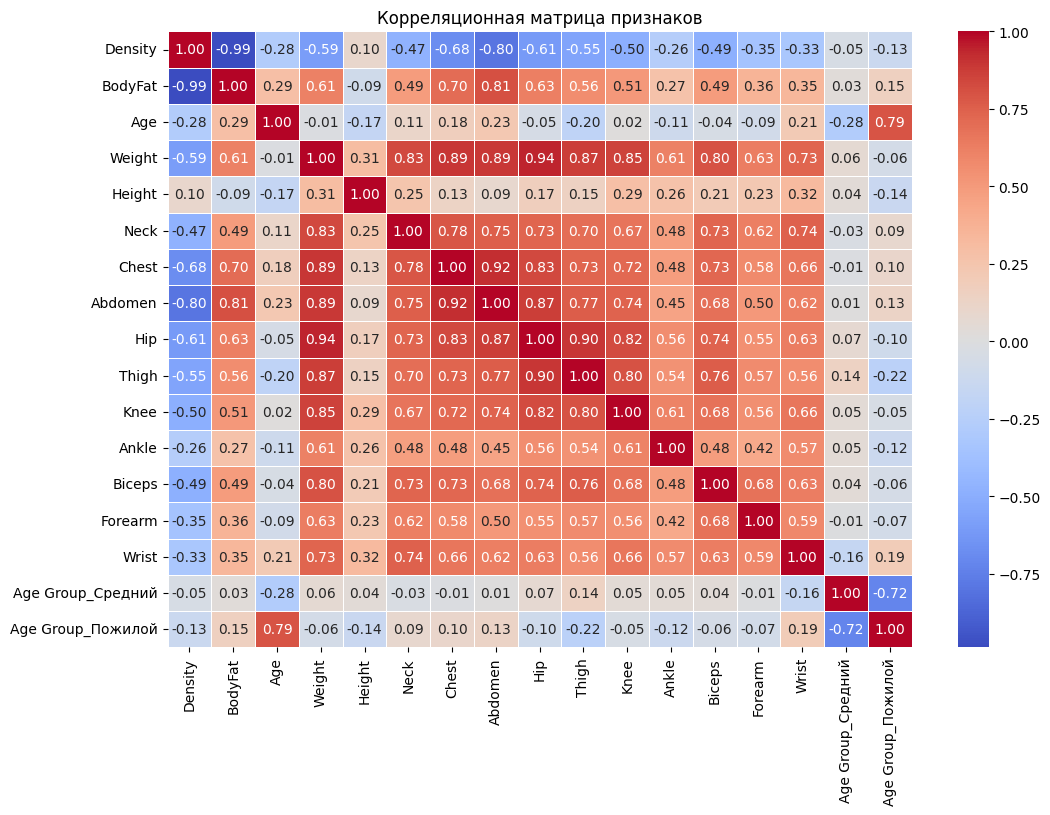

In [ ]:
# Корреляционная матрица
corr_matrix = data.corr()

# Тепловая карта
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()


Видно, что вес и бедра, гружь и живот, бедра и грудь, бедра и ляжки очень сильно коррелируют между собой

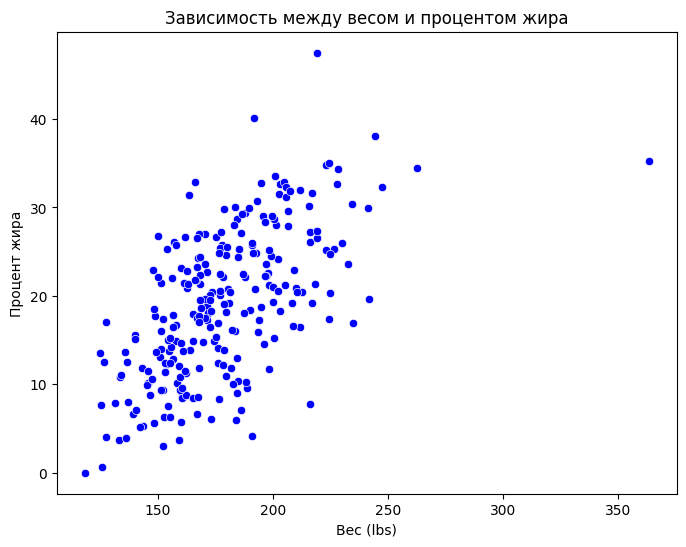

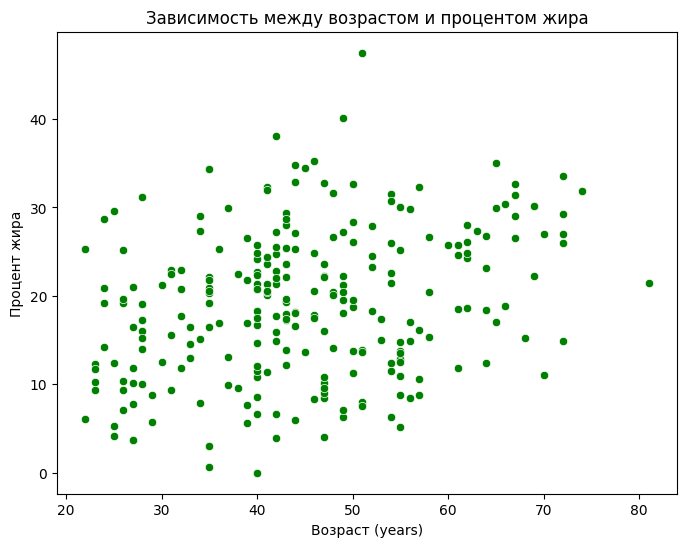

In [ ]:
# Диаграмма рассеяния для веса и процента жира в организме
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Weight'], y=data['BodyFat'], color='blue')
plt.title('Зависимость между весом и процентом жира')
plt.xlabel('Вес (lbs)')
plt.ylabel('Процент жира')
plt.show()

# Диаграмма рассеяния для возраста и процента жира
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Age'], y=data['BodyFat'], color='green')
plt.title('Зависимость между возрастом и процентом жира')
plt.xlabel('Возраст (years)')
plt.ylabel('Процент жира')
plt.show()


Видно, что возраст и процент жира не зависят друг от друга

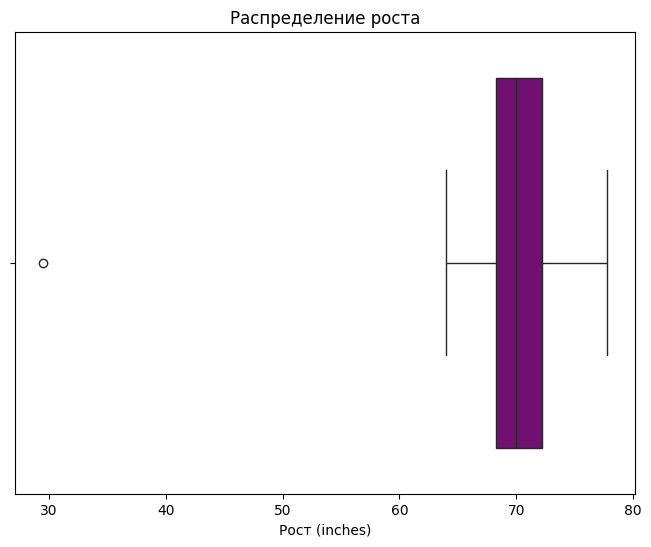

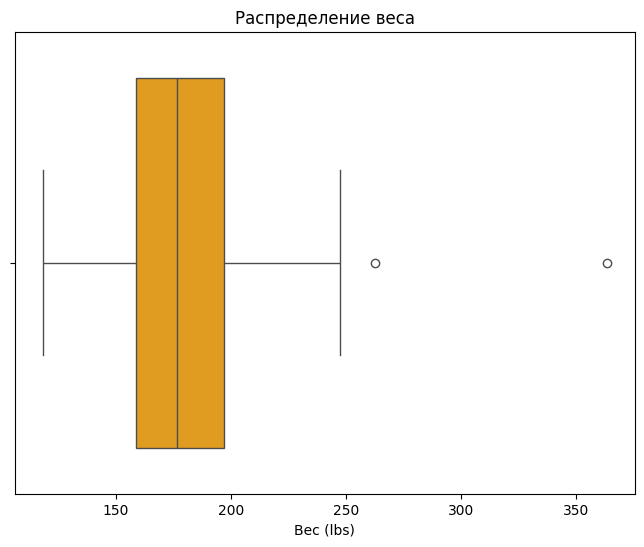

In [ ]:
# Диаграмма ящиков для роста
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Height'], color='purple')
plt.title('Распределение роста')
plt.xlabel('Рост (inches)')
plt.show()

# Диаграмма ящиков для веса
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Weight'], color='orange')
plt.title('Распределение веса')
plt.xlabel('Вес (lbs)')
plt.show()


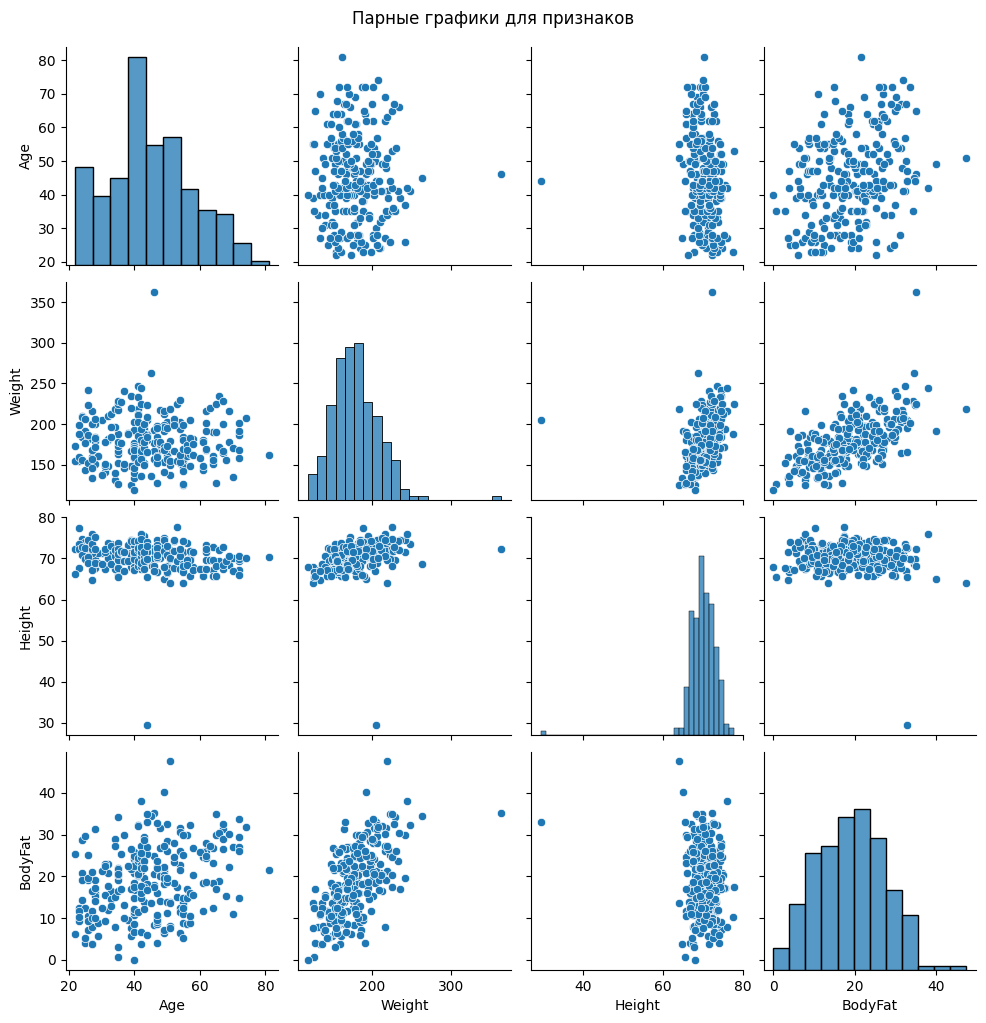

In [ ]:
# Парные графики для нескольких признаков
sns.pairplot(data[['Age', 'Weight', 'Height', 'BodyFat']])
plt.suptitle('Парные графики для признаков', y=1.02)
plt.show()


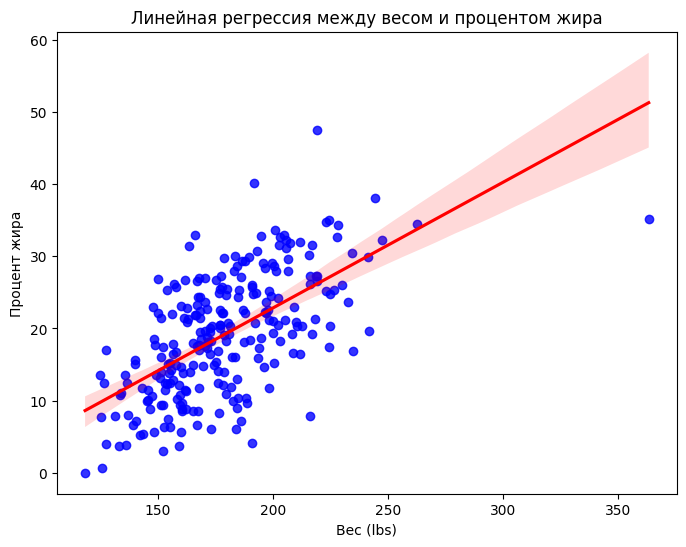

In [ ]:
# График регрессии для веса и процента жира
plt.figure(figsize=(8, 6))
sns.regplot(x=data['Weight'], y=data['BodyFat'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Линейная регрессия между весом и процентом жира')
plt.xlabel('Вес (lbs)')
plt.ylabel('Процент жира')
plt.show()


Явная линейная зависимость веса от процента жира

In [ ]:
# 5. Разделение выборки на тестовую и тренировочную
X = data.drop(columns=['BodyFat'])  # Удаляем целевую переменную
y = data['BodyFat']  # Целевая переменная

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nРазмеры тренировочной и тестовой выборок:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Размеры тренировочной и тестовой выборок:
X_train: (201, 16)
X_test: (51, 16)


Вывод:
мы сделали:
Загрузка данных в формате CSV.
Предварительная обработка данных:
Обработка пропущенных значений: Были обработаны пропущенные значения в числовых признаках путем их замены средними значениями. Это позволит избежать ошибок при обучении модели.
Категориальные данные: Для примера были добавлены категориальные данные для признака возраста (разбиение на группы: «Молодой», «Средний», «Пожилой»), а затем эти данные были преобразованы в числовой формат с помощью метода one-hot encoding.
Визуализация данных: Визуализация данных позволила получить более полное представление о их распределении и взаимосвязях. Мы построили различные графики, такие как:
Гистограммы для визуализации распределения признаков, таких как вес, рост и возраст.
Корреляционную матрицу (heatmap) для анализа взаимосвязей между признаками.
Диаграммы рассеяния для оценки зависимости между признаками,между весом и процентом жира.
Диаграммы ящиков для выявления выбросов в данных, по признакам роста и веса.
Парные графики для анализа возможных линейных зависимостей между несколькими признаками.
Графики регрессии для оценки линейной зависимости между такими признаками, как вес и процент жира в организме.
Разделение данных на тренировочную и тестовую выборки: Данные были разделены на две части: тренировочную (80%) и тестовую (20%). Это необходимо для последующего построения и оценки модели машинного обучения.